In [41]:
import numpy as np
import matplotlib.pyplot as plt

from preprocessing_part_parkinson_augmented import *
from preprocessing_part_parkinson import *
from preprocessing_part_parkinson_clean import *
from cv_fold_part import *
from eval_part import *
from prepare_training_part import *
from training_part import *
from utils import *
from models import *
from kde_part import *
import os


print("imports done")
np.set_printoptions(threshold=np.inf)
colors_map = {"baseline":"black","linear":"orange","cnn_sum":"gold","cnn_pure":"red"}

imports done


# Parkinson Experiment

In [8]:
np.random.seed(42)
domains_xs1, domains_ys1 = load_parkinson_data("../../data/telemonitoring_parkinsons_updrs.data.csv")
np.random.seed(42)
domains_emb1 = kde_part(domains_xs, kernel="gaussian", bandwidth=0.03, points=100)
np.random.seed(42)
splits = cv_fold_part(42, 5)


0


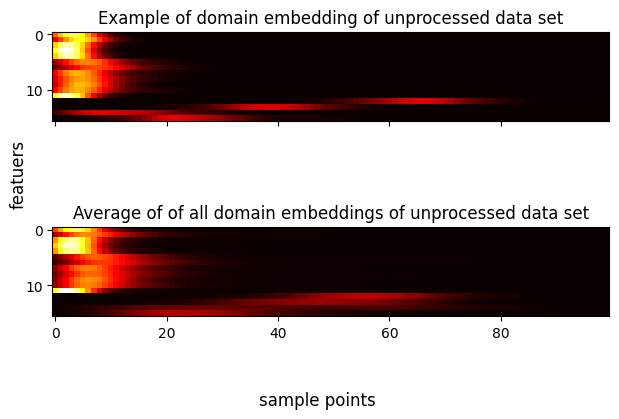

In [9]:
diff_domains = []
for i in domains_emb1:
    for j in i:
        diff_domains.append(j[0])
diff_domains = np.array(diff_domains)
fig, (ax1, ax2) = plt.subplots(2, 1,sharex=True, sharey=True)
ax1.imshow(diff_domains[0], cmap="hot")
ax1.set_title("Example of domain embedding of unprocessed data set")
ax2.imshow(np.mean(diff_domains,axis=0), cmap="hot")
ax2.set_title("Average of of all domain embeddings of unprocessed data set")
fig.tight_layout(pad=2.0)
fig.supylabel("featuers")
fig.supxlabel("sample points")
plt.show()


In [10]:
# np.random.seed(42)
# torch.random.manual_seed(42)

# experiment_name = "parkinson_experiment1"
# device = "mps"

# criterion = nn.MSELoss()

# for s,split in enumerate(splits):
#     model_list = [
#     ] 
#     # baseline model
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="baseline",
#         feature_size=0,
#         embedding_size=0,
#         embedding_nr_layers=0,
#         embedding_neurons=0,
#         embedding_head_class=head_empty,
#         hidden_size=0,
#         evaluation_input_size=16,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     #sum - in correct order (best to worst)
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=4,
#         embedding_neurons=100,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=20,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=1,
#         embedding_neurons=50,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=2,
#         embedding_neurons=300,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=4,
#         embedding_neurons=100,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=20,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=1,
#         embedding_neurons=300,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=40,
#         evaluation_input_size=56,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     #cnn pure
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=3,
#         embedding_neurons=16,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=3,
#         embedding_neurons=16,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=5,
#         embedding_neurons=32,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=5,
#         embedding_neurons=32,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=3,
#         embedding_neurons=32,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     #linear
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=1000,
#         embedding_head_class=head_linear,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=1000,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=500,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=5,
#         embedding_neurons=200,
#         embedding_head_class=head_linear,
#         hidden_size=20,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=500,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
    
#     train_loader, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=128)
#     training_part(train_loader, test1_loader, test2_loader,early_stopping=10,max_epochs=1000, lr=0.001, split_nr=s,model_list = model_list,device=device,criterion=criterion)

# Parkinson Experiment "normalized" values

In [11]:
np.random.seed(42)
domains_xs, domains_ys = load_parkinson_data_normalized_data("../../data/telemonitoring_parkinsons_updrs.data.csv", nr_outputs=1)
np.random.seed(42)
domains_emb = kde_part(domains_xs, kernel="gaussian", bandwidth=0.03, points=100)
np.random.seed(42)
splits = cv_fold_part(42, 5)

changed entries:  4835
0


42 1 149 16


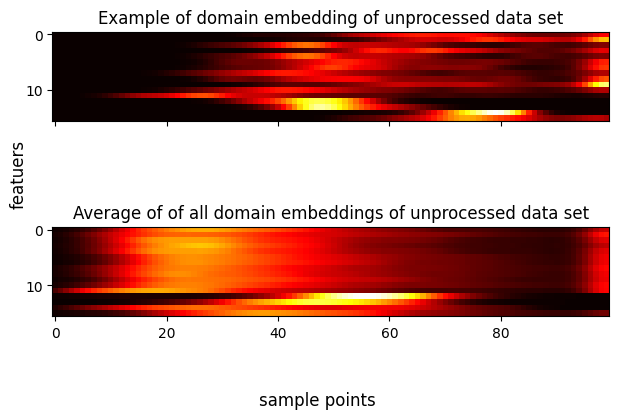

In [12]:
print(len(domains_emb), len(domains_emb[0]), len(domains_emb[0][0]), len(domains_emb[0][0][0]))
diff_domains2 = []
for i in domains_emb:
    for j in i:
        diff_domains2.append(j[0])

diff_domains2 = np.array(diff_domains2)

fig, (ax1, ax2) = plt.subplots(2, 1,sharex=True, sharey=True)
ax1.imshow(diff_domains2[30], cmap="hot")
ax1.set_title("Example of domain embedding of unprocessed data set")
ax2.imshow(np.mean(diff_domains2,axis=0), cmap="hot")
ax2.set_title("Average of of all domain embeddings of unprocessed data set")
fig.tight_layout(pad=2.0)
fig.supylabel("featuers")
fig.supxlabel("sample points")
plt.show()

In [13]:
# np.random.seed(42)
# torch.random.manual_seed(42)

# experiment_name = "parkinson_experiment2"
# device = "mps"

# criterion = nn.MSELoss()

# for s,split in enumerate(splits):
#     model_list = [
#     ] 
#     # baseline model
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="baseline",
#         feature_size=0,
#         embedding_size=0,
#         embedding_nr_layers=0,
#         embedding_neurons=0,
#         embedding_head_class=head_empty,
#         hidden_size=0,
#         evaluation_input_size=16,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     #sum - in correct order (best to worst)
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=4,
#         embedding_neurons=100,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=20,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=1,
#         embedding_neurons=50,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=2,
#         embedding_neurons=300,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=4,
#         embedding_neurons=100,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=20,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=1,
#         embedding_neurons=300,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=40,
#         evaluation_input_size=56,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     #cnn pure
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=3,
#         embedding_neurons=16,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=3,
#         embedding_neurons=16,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=5,
#         embedding_neurons=32,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=5,
#         embedding_neurons=32,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=3,
#         embedding_neurons=32,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     #linear
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=1000,
#         embedding_head_class=head_linear,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=1000,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=500,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=5,
#         embedding_neurons=200,
#         embedding_head_class=head_linear,
#         hidden_size=20,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=500,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
    
#     train_loader, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=128)
#     training_part(train_loader, test1_loader, test2_loader,early_stopping=10,max_epochs=1000, lr=0.001, split_nr=s,model_list = model_list,device=device,criterion=criterion)

# Parkinson Experiment: Vowels

In [14]:
np.random.seed(42)
domains_xs, domains_ys = load_parkinson_data_normalized_data_clean("../../data/telemonitoring_parkinsons_updrs_cleaned.csv",nr_outputs=1)
np.random.seed(42)
domains_emb = kde_part(domains_xs, kernel="gaussian", bandwidth=0.1, points=100)
np.random.seed(42)
splits = cv_fold_part(len(domains_emb), 5)

changed entries:  4403
0


Text(0.5, 0.01, 'sample points')

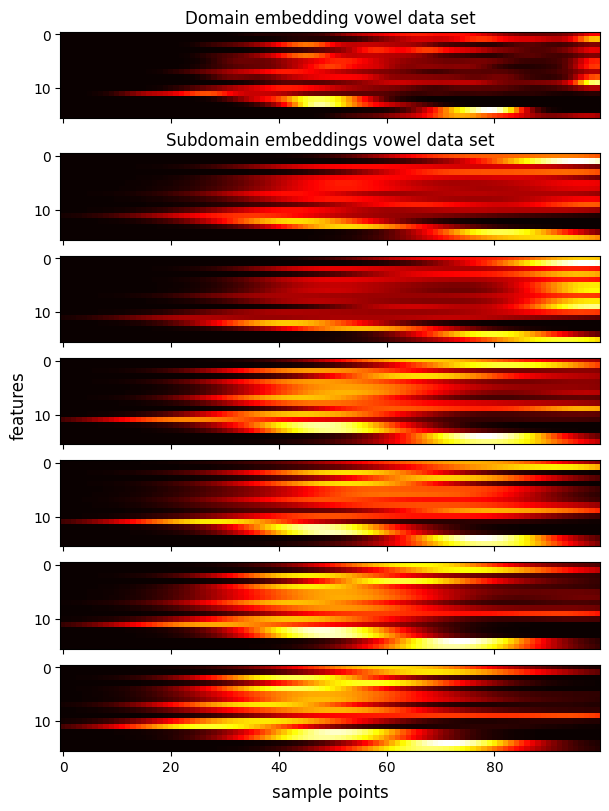

In [15]:
fig, axs = plt.subplots(7, sharex=True, sharey=True, constrained_layout=True,figsize=(8,8))
axs[0].set_title(f"Domain embedding vowel data set")
axs[0].imshow(diff_domains2[30], cmap="hot")
for n,i in enumerate(domains_emb[27:28]):
    for m,j in enumerate(i):
        axs[m+1].imshow(j[0], cmap="hot")
        if m==1:
            axs[m].set_title(f"Subdomain embeddings vowel data set")
fig.supylabel('features',x=0.1)
fig.supxlabel('sample points')


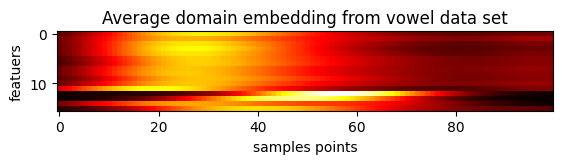

In [16]:
diff_domains3 = []
for i in domains_emb:
    for j in i:
        diff_domains3.append(j[0])
diff_domains3 = np.array(diff_domains3)
plt.imshow(np.mean(diff_domains3,axis=0), cmap="hot")
plt.ylabel("featuers")
plt.xlabel("samples points")
plt.title(f"Average domain embedding from vowel data set")
plt.show()

In [17]:
# np.random.seed(42)
# torch.random.manual_seed(42)

# experiment_name = "parkinson_experiment3"
# device = "mps"

# criterion = nn.MSELoss()

# for s,split in enumerate(splits):
#     model_list = [
#     ] 
#     # baseline model
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="baseline",
#         feature_size=0,
#         embedding_size=0,
#         embedding_nr_layers=0,
#         embedding_neurons=0,
#         embedding_head_class=head_empty,
#         hidden_size=0,
#         evaluation_input_size=16,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     #sum - in correct order (best to worst)
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=4,
#         embedding_neurons=100,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=20,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=1,
#         embedding_neurons=50,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=2,
#         embedding_neurons=300,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=4,
#         embedding_neurons=100,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=20,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_sum",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=1,
#         embedding_neurons=300,
#         embedding_head_class=head_cnn_weighted_sum,
#         hidden_size=40,
#         evaluation_input_size=56,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     #cnn pure
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=3,
#         embedding_neurons=16,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=3,
#         embedding_neurons=16,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=5,
#         embedding_neurons=32,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=5,
#         embedding_neurons=32,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="cnn_pure",
#         feature_size=16,
#         embedding_size=100,
#         embedding_nr_layers=3,
#         embedding_neurons=32,
#         embedding_head_class=head_cnn_pure,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     #linear
#     #1
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=1000,
#         embedding_head_class=head_linear,
#         hidden_size=5,
#         evaluation_input_size=21,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #2
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=1000,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #3
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=500,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #4
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=5,
#         embedding_neurons=200,
#         embedding_head_class=head_linear,
#         hidden_size=20,
#         evaluation_input_size=36,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
#     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=500,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))
    
#     train_loader, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=128)
#     training_part(train_loader, test1_loader, test2_loader,early_stopping=10,max_epochs=1000, lr=0.001, split_nr=s,model_list = model_list,device=device,criterion=criterion)

In [18]:
# torch.manual_seed(42)
# np.random.seed(42)
# all_split_data = []
# model_list = [
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean",channels = 16, embedding_size = 100, nr_layers_prior=1, nr_neurons_prior=14,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean",channels = 16, embedding_size = 100, nr_layers_prior=1,nr_neurons_prior=75,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean",channels = 16, embedding_size = 100, nr_layers_prior=2,nr_neurons_prior=75,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean",channels = 16, embedding_size = 100, nr_layers_prior=3,nr_neurons_prior=75,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean",channels = 16, embedding_size = 100, nr_layers_prior=2,nr_neurons_prior=44,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean",channels = 16, embedding_size = 100, nr_layers_prior=3,nr_neurons_prior=44,outputs = 1),

#         # model_only_parallel_embedding_pure_cnn(experiment="parkinson_clean",channels = 16, embedding_size = 100, nr_neurons_prior=30,outputs = 1),
#         model_baseline_linear(experiment="parkinson_clean",inputs=16,outputs=1,nr_layers_evaluation=1,nr_neurons_evaluation=100),
        
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean2",channels = 16, embedding_size = 100, nr_layers_prior=1,nr_neurons_prior=75,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean2",channels = 16, embedding_size = 100, nr_layers_prior=2,nr_neurons_prior=75,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean2",channels = 16, embedding_size = 100, nr_layers_prior=3,nr_neurons_prior=75,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean2",channels = 16, embedding_size = 100, nr_layers_prior=2,nr_neurons_prior=44,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean2",channels = 16, embedding_size = 100, nr_layers_prior=3,nr_neurons_prior=44,outputs = 1),

#         # model_only_parallel_embedding_linear(experiment="parkinson_clean0.1",channels = 16, embedding_size = 100, nr_layers_prior=1,nr_neurons_prior=75,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean0.1",channels = 16, embedding_size = 100, nr_layers_prior=2,nr_neurons_prior=75,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean0.1",channels = 16, embedding_size = 100, nr_layers_prior=3,nr_neurons_prior=75,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean0.1",channels = 16, embedding_size = 100, nr_layers_prior=2,nr_neurons_prior=44,outputs = 1),
#         # model_only_parallel_embedding_linear(experiment="parkinson_clean0.1",channels = 16, embedding_size = 100, nr_layers_prior=3,nr_neurons_prior=44,outputs = 1),
#  ] 
# model_names = [model.name for model in model_list]
# print(model_names)

# for s,split in enumerate(splits):
#     _, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=128)
#     s_res1 = eval_part(test_loader = test1_loader,test_loader_nr = 1, path_to_models = "models",model_names = model_names, split_nr=s)
#     s_res2 = eval_part(test_loader = test2_loader,test_loader_nr = 0, path_to_models = "models",model_names = model_names, split_nr=s)
#     print(s_res1)
#     print(s_res2)
#     all_split_data.append(s_res1)
#     all_split_data.append(s_res2)

# evaluation_results = np.array(all_split_data)
# print(model_names)
# print(evaluation_results.shape)

# for i in range(len(model_names)):
#     plt.plot(evaluation_results[:,i],marker="o", label=model_names[i])

# plt.show()

# # plt.plot(evaluation_results[:,-3])
# # plt.show()


# plt.plot(np.mean(evaluation_results,axis=0),marker="o", label="model_with_parallel_embedding_parkinson")
# print(np.mean(evaluation_results,axis=0))
# plt.show()

# Parkinson augmented (with new structure etc.)

In [19]:
np.random.seed(42)
domains_xs4, domains_ys4 = load_parkinson_data_normalized_augmented("../../data/telemonitoring_parkinsons_updrs_augmented.csv",nr_outputs=1)

In [20]:
np.random.seed(42)
domains_emb4 = kde_part(domains_xs4, kernel="gaussian", bandwidth=0.03, points=100)

0
100
200
300
400
500
600
700


741 6 180 16


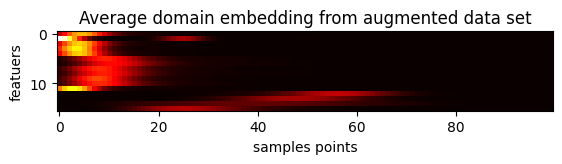

In [21]:
print(len(domains_emb4), len(domains_emb4[0]), len(domains_emb4[0][0]), len(domains_emb4[0][0][0]))
diff_domains4 = []
for i in domains_emb4:
    for j in i:
        diff_domains4.append(j[0])
diff_domains4 = np.array(diff_domains4)
plt.imshow(np.mean(diff_domains4,axis=0), cmap="hot")
plt.ylabel("featuers")
plt.xlabel("samples points")
plt.title(f"Average domain embedding from augmented data set")
plt.show()

In [22]:
np.random.seed(42)
splits4 = cv_fold_part(len(domains_emb4), 3)

In [23]:
# np.random.seed(42)
# torch.random.manual_seed(42)

# experiment_name = "parkinson_full_augmented"
# device = "mps"

# criterion = nn.MSELoss()


# for s,split in enumerate(splits):
#     # good model configurations
#     model_list = [
#                 ]

# #     #sum - in correct order (best to worst)
# #     #3
# #     model_list.append(
# #         model_embedding_and_input(
# #         experiment_name=experiment_name,
# #         model_name="cnn_sum",
# #         feature_size=16,
# #         embedding_size=100,
# #         embedding_nr_layers=2,
# #         embedding_neurons=300,
# #         embedding_head_class=head_cnn_weighted_sum,
# #         hidden_size=5,
# #         evaluation_input_size=21,
# #         evaluation_nr_layers=1,
# #         evaluation_neurons=500,
# #         evaluation_head_class=head_linear,
# #         output_size=1,
# #     ))
# #     #4
# #     model_list.append(
# #         model_embedding_and_input(
# #         experiment_name=experiment_name,
# #         model_name="cnn_sum",
# #         feature_size=16,
# #         embedding_size=100,
# #         embedding_nr_layers=4,
# #         embedding_neurons=100,
# #         embedding_head_class=head_cnn_weighted_sum,
# #         hidden_size=20,
# #         evaluation_input_size=36,
# #         evaluation_nr_layers=1,
# #         evaluation_neurons=500,
# #         evaluation_head_class=head_linear,
# #         output_size=1,
# #     ))
# #     #5
# #     model_list.append(
# #         model_embedding_and_input(
# #         experiment_name=experiment_name,
# #         model_name="cnn_sum",
# #         feature_size=16,
# #         embedding_size=100,
# #         embedding_nr_layers=1,
# #         embedding_neurons=300,
# #         embedding_head_class=head_cnn_weighted_sum,
# #         hidden_size=40,
# #         evaluation_input_size=56,
# #         evaluation_nr_layers=1,
# #         evaluation_neurons=500,
# #         evaluation_head_class=head_linear,
# #         output_size=1,
# #     ))

# #     #cnn pure
# #     #2
# #     model_list.append(
# #         model_embedding_and_input(
# #         experiment_name=experiment_name,
# #         model_name="cnn_pure",
# #         feature_size=16,
# #         embedding_size=100,
# #         embedding_nr_layers=3,
# #         embedding_neurons=16,
# #         embedding_head_class=head_cnn_pure,
# #         hidden_size=5,
# #         evaluation_input_size=21,
# #         evaluation_nr_layers=1,
# #         evaluation_neurons=500,
# #         evaluation_head_class=head_linear,
# #         output_size=1,
# #     ))
# #     #3
# #     model_list.append(
# #         model_embedding_and_input(
# #         experiment_name=experiment_name,
# #         model_name="cnn_pure",
# #         feature_size=16,
# #         embedding_size=100,
# #         embedding_nr_layers=5,
# #         embedding_neurons=32,
# #         embedding_head_class=head_cnn_pure,
# #         hidden_size=5,
# #         evaluation_input_size=21,
# #         evaluation_nr_layers=1,
# #         evaluation_neurons=500,
# #         evaluation_head_class=head_linear,
# #         output_size=1,
# #     ))
# #     #4
# #     model_list.append(
# #         model_embedding_and_input(
# #         experiment_name=experiment_name,
# #         model_name="cnn_pure",
# #         feature_size=16,
# #         embedding_size=100,
# #         embedding_nr_layers=5,
# #         embedding_neurons=32,
# #         embedding_head_class=head_cnn_pure,
# #         hidden_size=10,
# #         evaluation_input_size=26,
# #         evaluation_nr_layers=1,
# #         evaluation_neurons=500,
# #         evaluation_head_class=head_linear,
# #         output_size=1,
# #     ))
# #     #5
# #     model_list.append(
# #         model_embedding_and_input(
# #         experiment_name=experiment_name,
# #         model_name="cnn_pure",
# #         feature_size=16,
# #         embedding_size=100,
# #         embedding_nr_layers=3,
# #         embedding_neurons=32,
# #         embedding_head_class=head_cnn_pure,
# #         hidden_size=10,
# #         evaluation_input_size=26,
# #         evaluation_nr_layers=1,
# #         evaluation_neurons=500,
# #         evaluation_head_class=head_linear,
# #         output_size=1,
# #     ))

# #     #linear
# #     #1
# #     model_list.append(
# #         model_embedding_and_input(
# #         experiment_name=experiment_name,
# #         model_name="linear",
# #         feature_size=100,
# #         embedding_size=16,
# #         embedding_nr_layers=4,
# #         embedding_neurons=1000,
# #         embedding_head_class=head_linear,
# #         hidden_size=5,
# #         evaluation_input_size=21,
# #         evaluation_nr_layers=1,
# #         evaluation_neurons=500,
# #         evaluation_head_class=head_linear,
# #         output_size=1,
# #     ))
# #     #2
# #     model_list.append(
# #         model_embedding_and_input(
# #         experiment_name=experiment_name,
# #         model_name="linear",
# #         feature_size=100,
# #         embedding_size=16,
# #         embedding_nr_layers=4,
# #         embedding_neurons=1000,
# #         embedding_head_class=head_linear,
# #         hidden_size=10,
# #         evaluation_input_size=26,
# #         evaluation_nr_layers=1,
# #         evaluation_neurons=500,
# #         evaluation_head_class=head_linear,
# #         output_size=1,
# #     ))
# #     #4
# #     model_list.append(
# #         model_embedding_and_input(
# #         experiment_name=experiment_name,
# #         model_name="linear",
# #         feature_size=100,
# #         embedding_size=16,
# #         embedding_nr_layers=5,
# #         embedding_neurons=200,
# #         embedding_head_class=head_linear,
# #         hidden_size=20,
# #         evaluation_input_size=36,
# #         evaluation_nr_layers=1,
# #         evaluation_neurons=500,
# #         evaluation_head_class=head_linear,
# #         output_size=1,
# #     ))
# #     #5
#     model_list.append(
#         model_embedding_and_input(
#         experiment_name=experiment_name,
#         model_name="linear",
#         feature_size=100,
#         embedding_size=16,
#         embedding_nr_layers=4,
#         embedding_neurons=500,
#         embedding_head_class=head_linear,
#         hidden_size=10,
#         evaluation_input_size=26,
#         evaluation_nr_layers=1,
#         evaluation_neurons=500,
#         evaluation_head_class=head_linear,
#         output_size=1,
#     ))

#     train_loader, test1_loader, test2_loader = training_preparation_part(domains_emb, domains_xs, domains_ys, split, batch_size=128)
#     training_part(train_loader, test1_loader, test2_loader,early_stopping=10,max_epochs=1000, lr=0.001, split_nr=s,model_list = model_list,device=device,criterion=criterion)

In [24]:
experiment_name = "parkinson_full_augmented"

all_models = os.listdir("models")
model_names4 = [m[:-7] for m in all_models if m.startswith(experiment_name) and m.endswith("2_0.pt")]
model_names4 = sorted(list(set(model_names4)))


print(model_names4[13])


types = [i.split("|")[0].split("-")[1] for i in model_names4]
colors = [colors_map[i] for i in types]
print(len(model_names4),model_names4)

parkinson_full_augmented-linear|head_linear-100-16-4-500-10-0.3|head_linear-26-1-1-500-1-0.3
16 ['parkinson_full_augmented-baseline|head_empty-0-0-0-0-0-0.3|head_linear-16-1-1-500-1-0.3', 'parkinson_full_augmented-cnn_pure|head_cnn_pure-16-100-3-16-10-0.3|head_linear-26-1-1-500-1-0.3', 'parkinson_full_augmented-cnn_pure|head_cnn_pure-16-100-3-16-5-0.3|head_linear-21-1-1-500-1-0.3', 'parkinson_full_augmented-cnn_pure|head_cnn_pure-16-100-3-32-10-0.3|head_linear-26-1-1-500-1-0.3', 'parkinson_full_augmented-cnn_pure|head_cnn_pure-16-100-5-32-10-0.3|head_linear-26-1-1-500-1-0.3', 'parkinson_full_augmented-cnn_pure|head_cnn_pure-16-100-5-32-5-0.3|head_linear-21-1-1-500-1-0.3', 'parkinson_full_augmented-cnn_sum|head_cnn_weighted_sum-16-100-1-300-40-0.3|head_linear-56-1-1-500-1-0.3', 'parkinson_full_augmented-cnn_sum|head_cnn_weighted_sum-16-100-1-50-20-0.3|head_linear-36-1-1-500-1-0.3', 'parkinson_full_augmented-cnn_sum|head_cnn_weighted_sum-16-100-2-300-5-0.3|head_linear-21-1-1-500-1-0.3', 

In [25]:
# device = "mps"
# torch.manual_seed(42)
# np.random.seed(42)
# # criterion = nn.MSELoss()
# criterion = nn.L1Loss()


# all_split_data = []
# model_list = []

# print(len(model_names4), model_names4)

# for s,split in enumerate(splits4):
#     _, test1_loader, test2_loader = training_preparation_part(domains_emb4, domains_xs4, domains_ys4, split, batch_size=1024)
#     s_res1 = eval_part(test_loader = test1_loader,test_loader_nr = 1, path_to_models = "models",model_names = model_names4, split_nr=s,criterion=criterion,device=device)
#     s_res2 = eval_part(test_loader = test2_loader,test_loader_nr = 0, path_to_models = "models",model_names = model_names4, split_nr=s,criterion=criterion,device=device)
#     print(s_res1)
#     print(s_res2)

#     all_split_data.append(s_res1)
#     all_split_data.append(s_res2)

# evaluation_results = np.array(all_split_data)
# #save evaluation results
# # np.save("evaluation_results_parkinson_augmented_absolute.npy",evaluation_results)

In [26]:
# device = "mps"
# torch.manual_seed(42)
# np.random.seed(42)
# criterion = nn.MSELoss()

# domain_specific_results = [[] for _ in range(len(domains_emb4))]
# for j in range(len(domains_emb4)):
#     print("NEW DOMAIN",j)
#     for s in range(len(splits4)):
#         split = [np.array([0]),np.array([i]),np.array([i])]
#         _, test1_loader, test2_loader = training_preparation_part(domains_emb4, domains_xs4, domains_ys4, split, batch_size=1024)
#         s_res1 = eval_part(test_loader = test1_loader,test_loader_nr = 1, path_to_models = "models",model_names = model_names4, split_nr=s,criterion=criterion,device=device)
#         s_res2 = eval_part(test_loader = test2_loader,test_loader_nr = 0, path_to_models = "models",model_names = model_names4, split_nr=s,criterion=criterion,device=device)
#         print(s_res1)
#         print(s_res2)
#         domain_specific_results[j].append(s_res1)
#         domain_specific_results[j].append(s_res2)

# # np.save("evaluation_results_parkinson_augmented_domain_specific.npy",domain_specific_results)

(741, 96)


Text(0, 0.5, 'MSE')

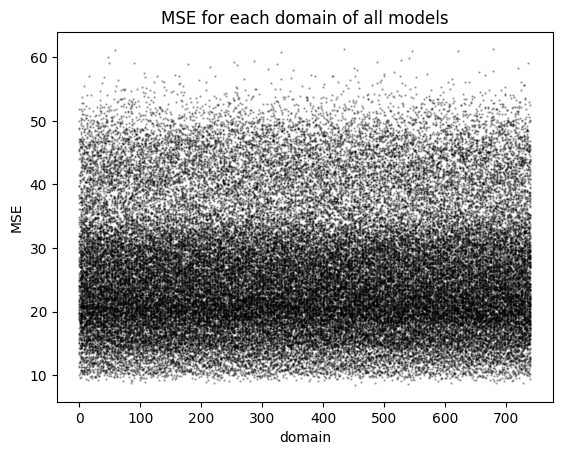

In [28]:
domain_specific_results = np.load("evaluation_results_parkinson_augmented_domain_specific.npy")
domain_specific_results = np.array(domain_specific_results)
domain_specific_results = domain_specific_results.reshape(741,-1)

for i in range(741):
    plt.scatter(np.ones(96)*i,domain_specific_results[i],color="black",alpha=0.3,s=0.5)

plt.title("MSE for each domain of all models")
plt.xlabel("domain")
plt.ylabel("MSE")

# Evaluation of all results

In [29]:
np.random.seed(42)
domains_xs1, domains_ys1 = load_parkinson_data("../../data/telemonitoring_parkinsons_updrs.data.csv")
np.random.seed(42)
domains_emb1 = kde_part(domains_xs1, kernel="gaussian", bandwidth=0.03, points=100)
splits1 = cv_fold_part(42, 5)

np.random.seed(42)
domains_xs2, domains_ys2 = load_parkinson_data_normalized_data("../../data/telemonitoring_parkinsons_updrs.data.csv", nr_outputs=1)
np.random.seed(42)
domains_emb2 = kde_part(domains_xs2, kernel="gaussian", bandwidth=0.03, points=100)
splits2 = cv_fold_part(42, 5)

np.random.seed(42)
domains_xs3, domains_ys3 = load_parkinson_data_normalized_data_clean("../../data/telemonitoring_parkinsons_updrs_cleaned.csv",nr_outputs=1)
np.random.seed(42)
domains_emb3 = kde_part(domains_xs3, kernel="gaussian", bandwidth=0.1, points=100)
splits3 = cv_fold_part(38, 5)

0
changed entries:  4835
0
changed entries:  4403
0


In [30]:
experiment_name1 = "parkinson_experiment1"
experiment_name2 = "parkinson_experiment2"
experiment_name3 = "parkinson_experiment3"


all_models = os.listdir("models")
model_names1 = [m[:-7] for m in all_models if m.startswith(experiment_name1)]
model_names1 = sorted(list(set(model_names1)))

model_names2 = [m[:-7] for m in all_models if m.startswith(experiment_name2)]
model_names2 = sorted(list(set(model_names2)))

model_names3 = [m[:-7] for m in all_models if m.startswith(experiment_name3)]
model_names3 = sorted(list(set(model_names3)))

run_eval = [[model_names1,domains_xs1,domains_ys1,domains_emb1,splits1],[model_names2,domains_xs2,domains_ys2,domains_emb2,splits2],[model_names3,domains_xs3,domains_ys3,domains_emb3,splits3]]

In [31]:
# device = "mps"
# torch.manual_seed(42)
# np.random.seed(42)
# criterion = nn.MSELoss()

# all_split_data_experiments = [[] for j in range(3)]
# for n,i in enumerate(run_eval):
#     print(n)
#     for s,split in enumerate(i[4]):
#         _, test1_loader, test2_loader = training_preparation_part(i[3], i[1], i[2], split, batch_size=1024)
#         s_res1 = eval_part(test_loader = test1_loader,test_loader_nr = 1, path_to_models = "models",model_names = i[0], split_nr=s,criterion=criterion,device=device)
#         s_res2 = eval_part(test_loader = test2_loader,test_loader_nr = 0, path_to_models = "models",model_names = i[0], split_nr=s,criterion=criterion,device=device)
#         print(s_res1)
#         print(s_res2)

#         all_split_data_experiments[n].append(s_res1)
#         all_split_data_experiments[n].append(s_res2)

# evaluation_results = np.array(all_split_data_experiments)
# # np.save("parkinson_expereiments_results.npy",evaluation_results)

In [32]:
experiments_results = np.load("parkinson_experiments_results.npy")
experiments_results_augments = np.load("evaluation_results_parkinson_augmented.npy")
experiments_results_augments_absolute = np.load("evaluation_results_parkinson_augmented_absolute.npy")

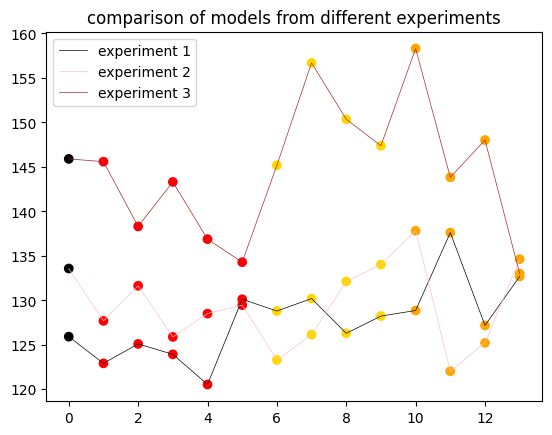

In [47]:
experiments_results_mean = np.mean(experiments_results,axis=1)

line_colors = ["black","pink","brown"]
for n,i in enumerate(run_eval):
    types = [i.split("|")[0].split("-")[1] for i in i[0]]
    colors = [colors_map[i] for i in types]
    plt.scatter(np.arange(14),experiments_results_mean[n], c=colors)
    plt.plot(np.arange(14),experiments_results_mean[n], c=line_colors[n], linewidth=0.5,label=f"experiment {n+1}")
plt.legend()
plt.title("comparison of models from different experiments")
plt.show()

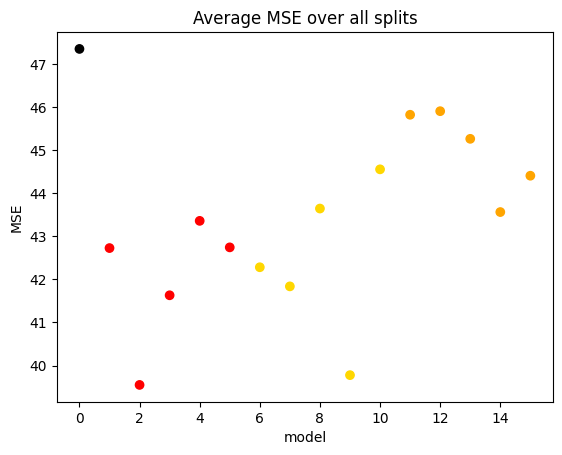

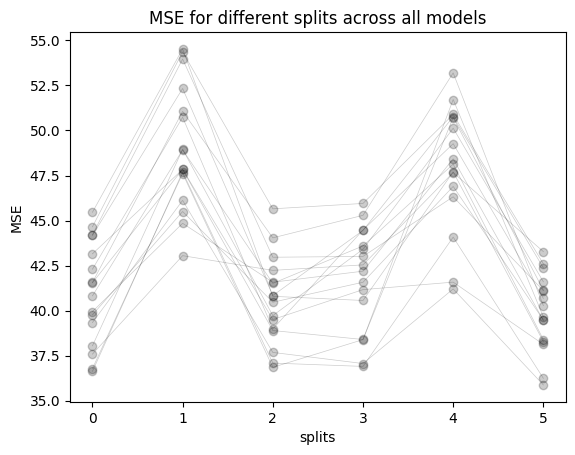

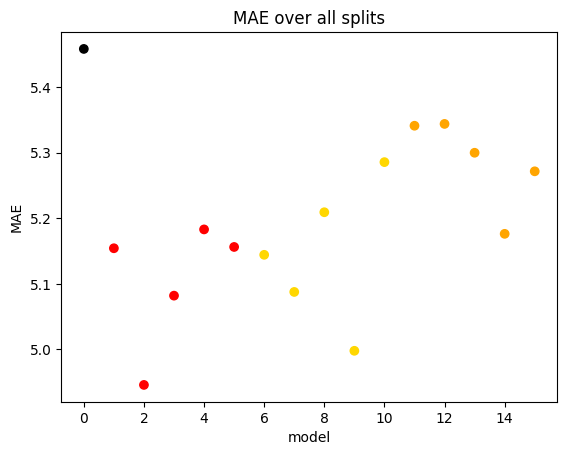

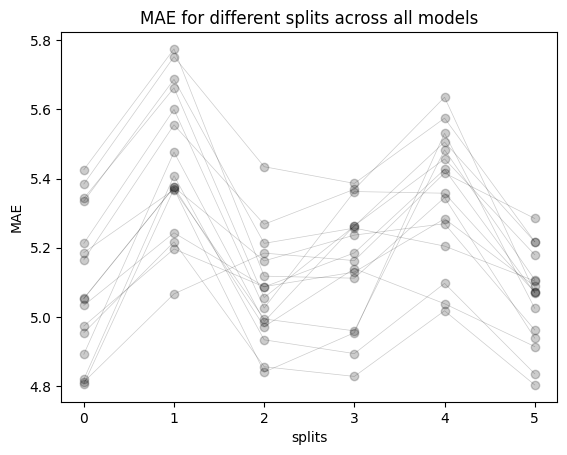

In [42]:
# images for experiment 4
experiments_results_augments_mean = np.mean(experiments_results_augments,axis=0)

types = [j.split("|")[0].split("-")[1] for j in model_names4]

colors = [colors_map[i] for i in types]
plt.scatter(np.arange(16),experiments_results_augments_mean, c=colors)
plt.title("Average MSE over all splits")
plt.xlabel("model")
plt.ylabel("MSE")
plt.show()

for s in experiments_results_augments.T:
    plt.plot(s,marker="o",c="black",linewidth=0.5,alpha=0.2)
plt.title("MSE for different splits across all models")
plt.xlabel("splits")
plt.ylabel("MSE")
plt.show()

experiments_results_augments_absolute_mean = np.mean(experiments_results_augments_absolute,axis=0)

types = [j.split("|")[0].split("-")[1] for j in model_names4]

colors = [colors_map[i] for i in types]
plt.scatter(np.arange(16),experiments_results_augments_absolute_mean, c=colors)
plt.title("MAE over all splits")
plt.xlabel("model")
plt.ylabel("MAE")
plt.show()

for s in experiments_results_augments_absolute.T:
    plt.plot(s,marker="o",c="black",linewidth=0.5,alpha=0.2)
plt.title("MAE for different splits across all models")
plt.xlabel("splits")
plt.ylabel("MAE")
plt.show()

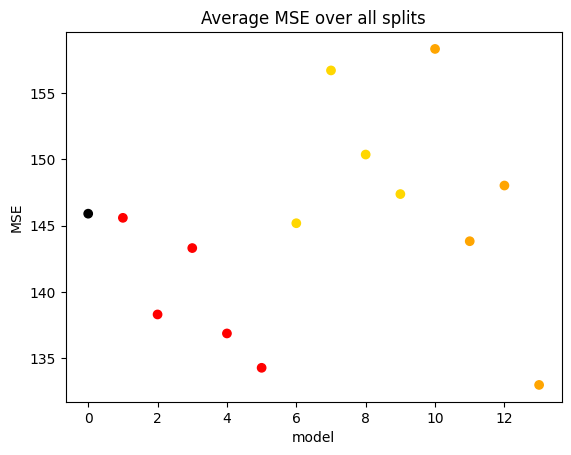

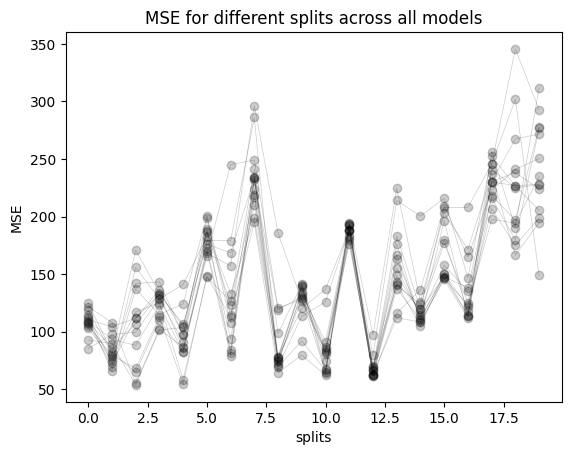

In [43]:
experiment_nr =2
# images for experiment 1
experiments_results_mean = np.mean(experiments_results,axis=1)

types = [j.split("|")[0].split("-")[1] for j in model_names1]

colors = [colors_map[i] for i in types]
plt.scatter(np.arange(14),experiments_results_mean[experiment_nr], c=colors)
plt.title("Average MSE over all splits")
plt.xlabel("model")
plt.ylabel("MSE")
plt.show()

for s in experiments_results[experiment_nr].T:
    plt.plot(s,marker="o",c="black",linewidth=0.5,alpha=0.2)
plt.title("MSE for different splits across all models")
plt.xlabel("splits")
plt.ylabel("MSE")
plt.show()

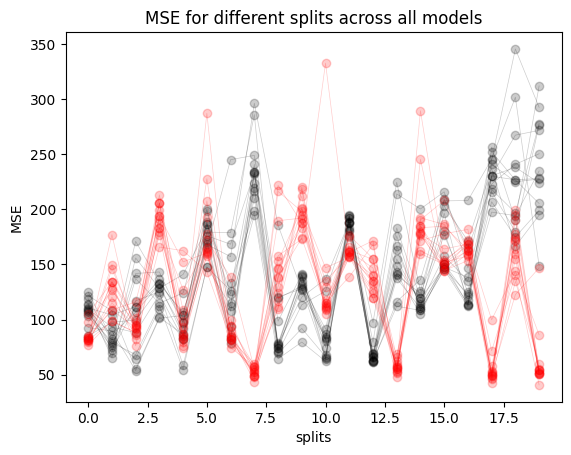

In [46]:
for s in experiments_results[2].T:
    plt.plot(s,marker="o",c="black",linewidth=0.5,alpha=0.2)
for s in experiments_results[0].T:
    plt.plot(s,marker="o",c="red",linewidth=0.5,alpha=0.2)
plt.title("MSE for different splits across all models")
plt.xlabel("splits")
plt.ylabel("MSE")
plt.show()